# K - Nearest Neighbors

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
import copy

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Target Variable 'Death Rate Categories'

In [2]:
df_death = pd.read_csv("final_death_data.csv")

In [3]:
df_death['Death Rate Categories'] = df_death['Death Rate Categories'].astype('category')

In [4]:
X = df_death.iloc[:, :-1] # Features is all columns in the dataframe except the last column
Y = df_death.iloc[:, -1] # Target is the last column in the dataframe: ''

In [5]:
# Split dataset into training set and test set 
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=2019)

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [8]:
y_pred = classifier.predict(X_test)

In [9]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[304  49  34   3   0   0]
 [ 47 104  44   7   1   0]
 [ 70  64  78  12   4   0]
 [ 15  38  30   5   1   0]
 [ 10   3  10   4   0   0]
 [  0   0   3   1   0   1]]
              precision    recall  f1-score   support

           0       0.68      0.78      0.73       390
           1       0.40      0.51      0.45       203
           2       0.39      0.34      0.37       228
           3       0.16      0.06      0.08        89
           4       0.00      0.00      0.00        27
           5       1.00      0.20      0.33         5

    accuracy                           0.52       942
   macro avg       0.44      0.32      0.33       942
weighted avg       0.48      0.52      0.50       942



In [10]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

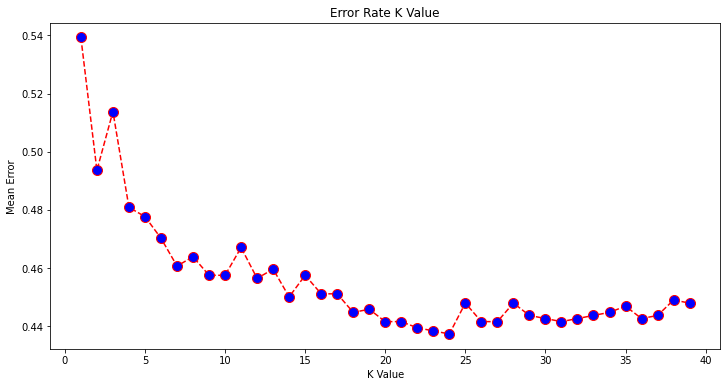

In [11]:
# source: https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# Target Variable 'Case Rate Categories'

In [12]:
df_case = pd.read_csv("final_case_data.csv")

In [13]:
X = df_death.iloc[:, :-1] # Features is all columns in the dataframe except the last column
Y = df_case.iloc[:, -1] # Target is the last column in the dataframe: 'Case Rate Categories'

In [14]:
# Split dataset into training set and test set 
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=2019)

In [15]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 19  21   0   0   0   0]
 [  9 336  84   1   1   0]
 [  7 164 164  16   0   1]
 [  1  20  50   4   0   0]
 [  1   4  15   2   0   1]
 [  0   9   8   4   0   0]]
              precision    recall  f1-score   support

           0       0.51      0.47      0.49        40
           1       0.61      0.78      0.68       431
           2       0.51      0.47      0.49       352
           3       0.15      0.05      0.08        75
           4       0.00      0.00      0.00        23
           5       0.00      0.00      0.00        21

    accuracy                           0.56       942
   macro avg       0.30      0.30      0.29       942
weighted avg       0.50      0.56      0.52       942



In [19]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

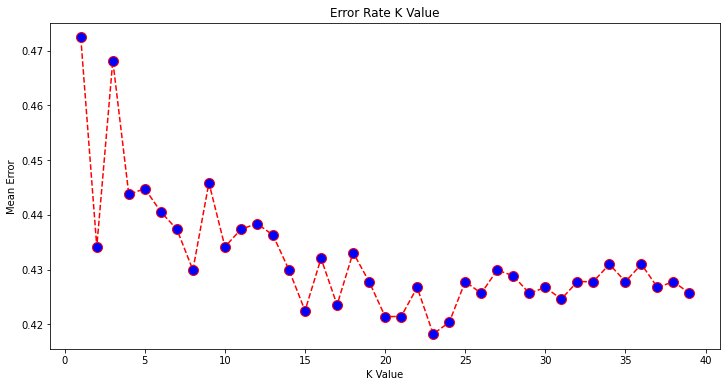

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')